### 1. Data Understanding and Exploration

Looking  at the dataset and understand the size, attribute names etc.

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
import os


In [2]:
# Import train dataframe
house = pd.read_csv("train.csv")
# Since column count is more than the default Jupyter settings, let's refit the visible columns
# Expect some new column additions for deriving new dummy columns from existing data hence setting the column limit 100
pd.set_option('max_columns', 200)
pd.set_option('display.max_colwidth', 150)
house.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [3]:

# summary of the dataset: 
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
# Dropping the 'Id' columns as the DataFrames are already indexed.
house.drop(['Id'],axis=1,inplace=True)


### Check for Missing Values

In [5]:
house.isnull().any()

MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
                 ...  
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
FireplaceQu       True
GarageType        True
GarageYrBlt       True
GarageFinish      True
GarageCars       False
GarageArea       False
GarageQual 

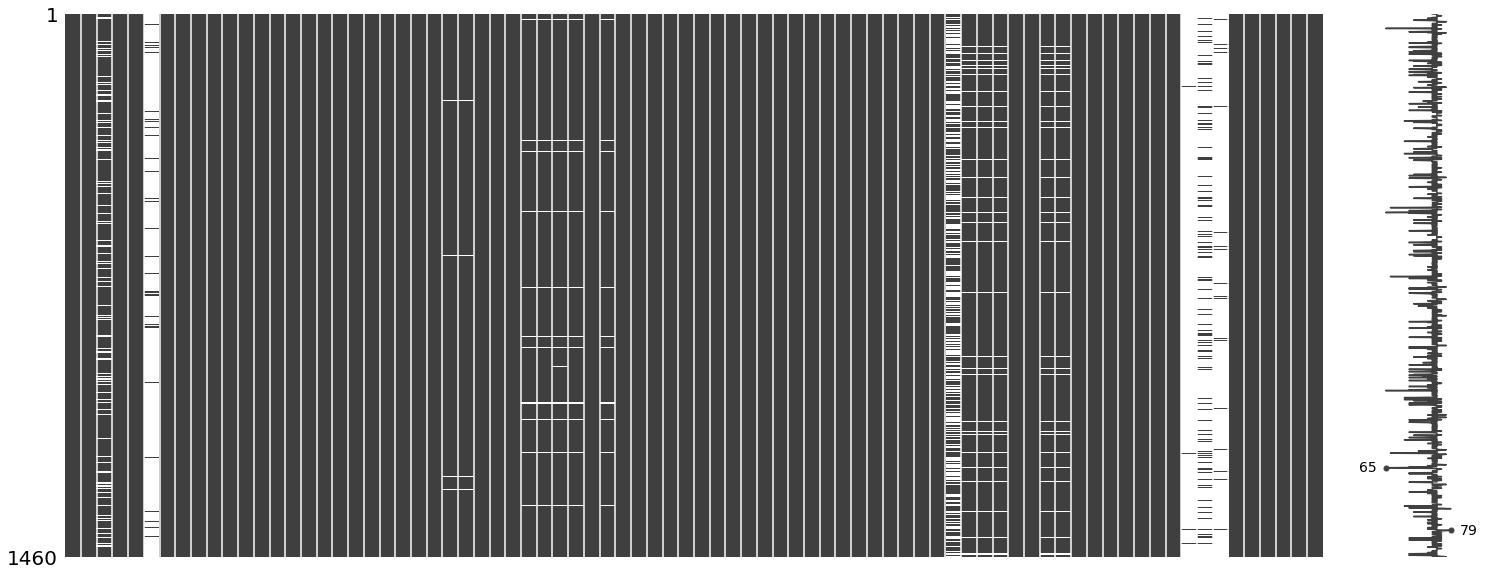

In [6]:
msno.matrix(house) # just to visulaize.

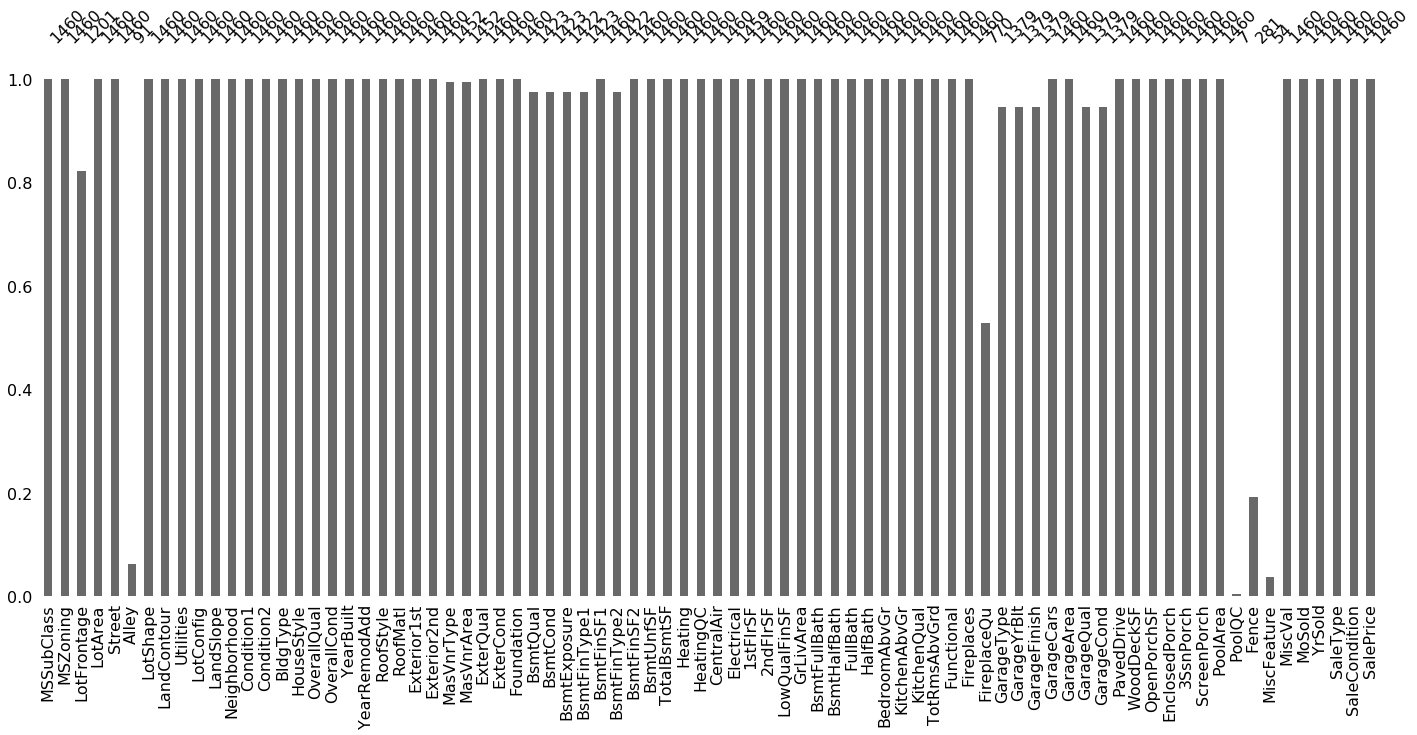

In [7]:
msno.bar(house);

In [8]:
c_m= house[:].corr()
c_tar=c_m.sort_values(['SalePrice'],ascending=False)

In [9]:
print("relevant features  for Saleprice :")
c_tar.SalePrice

relevant features  for Saleprice :


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

##  corelation value >0.5 are really significant.

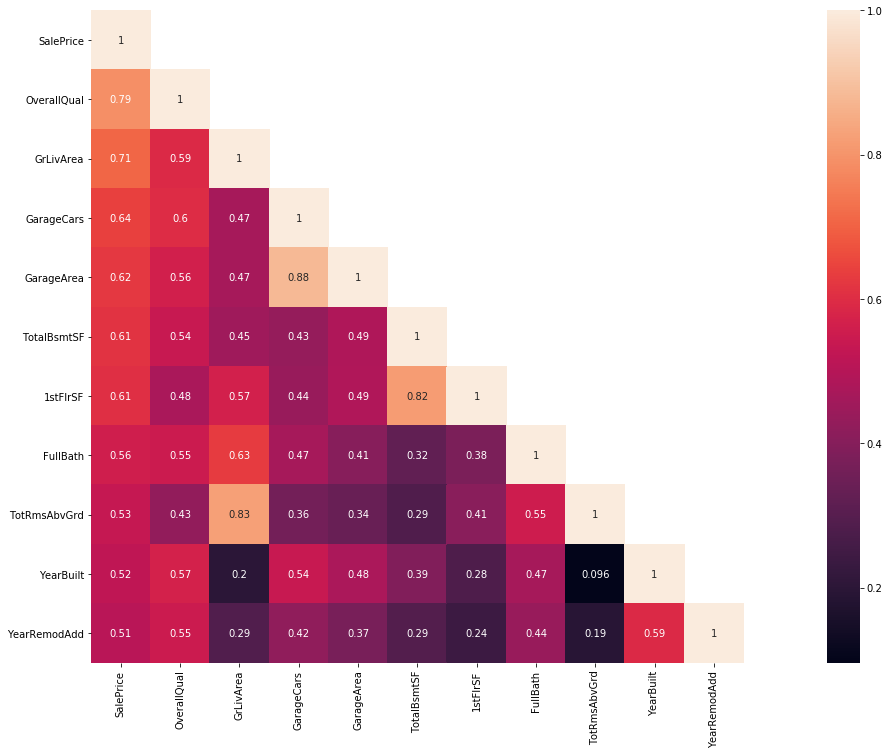

In [10]:
#corelation matrix.
c_m= house[['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']].corr()
m = np.array(c_m)
m[np.tril_indices_from(m)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=c_m,mask=m,square=True,annot=True,cbar=True)

##  Univariate Analysis

### univariate analysis for those features which have very high corelation 

In [11]:
def p_n(feature):
    fig,axes=plt.subplots(1,2)
    sns.boxplot(data=house,x=feature,ax=axes[0])
    sns.distplot(a=house[feature],ax=axes[1],color='#ff4125')
    fig.set_size_inches(15,5)

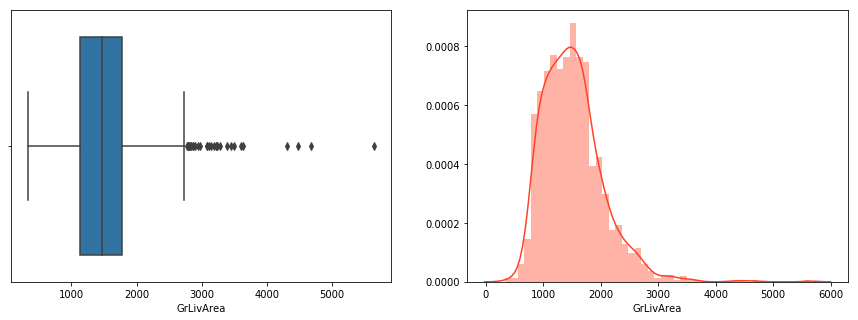

In [12]:

p_n('GrLivArea')

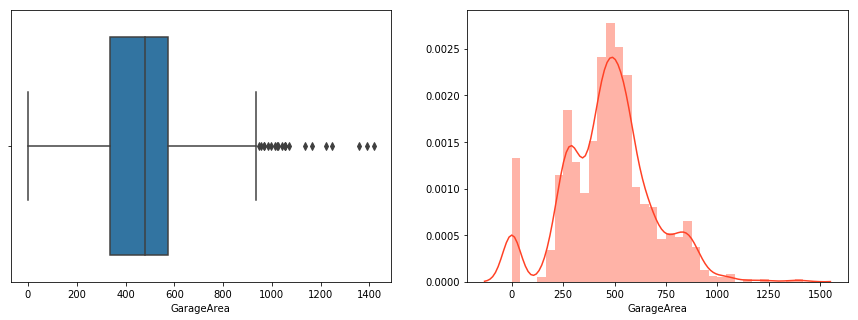

In [13]:
p_n('GarageArea')

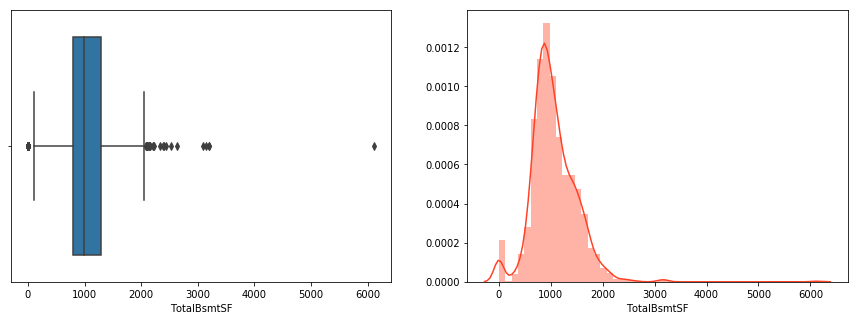

In [14]:
p_n('TotalBsmtSF')

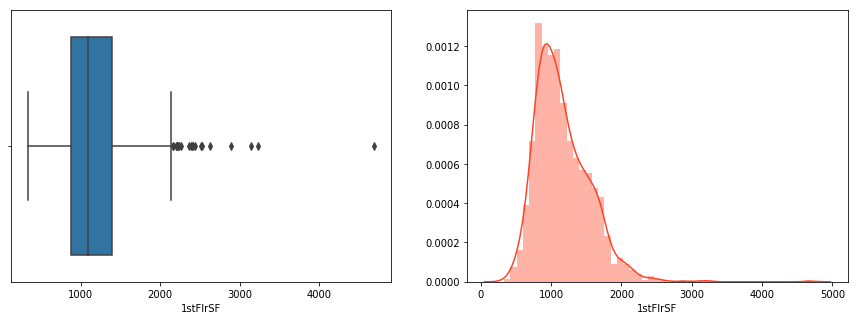

In [15]:
p_n('1stFlrSF')

In [16]:
def p_c(feature):
  sns.countplot(data=house,x=feature)
  b=sns.countplot(data=house,x=feature)

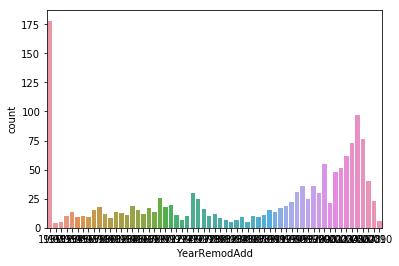

In [17]:
p_c('YearRemodAdd')

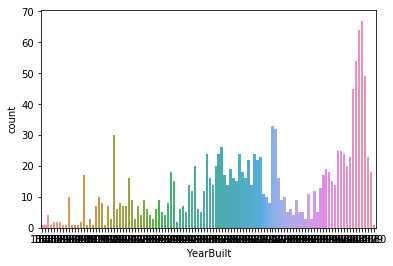

In [18]:
p_c('YearBuilt')

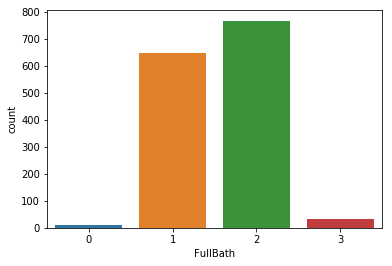

In [19]:
p_c('FullBath')

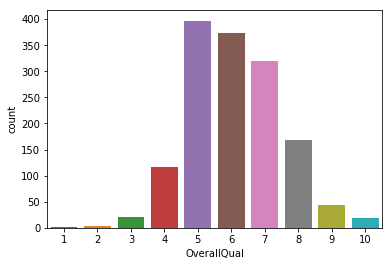

In [20]:
p_c('OverallQual')

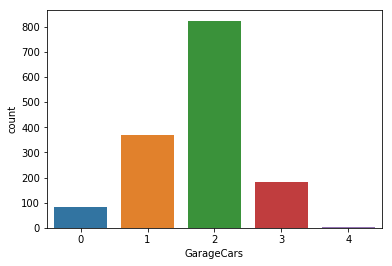

In [21]:
p_c('GarageCars')

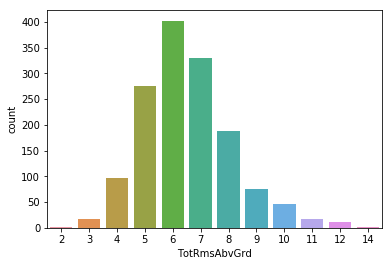

In [22]:
p_c('TotRmsAbvGrd')

## Bivariate Analysis

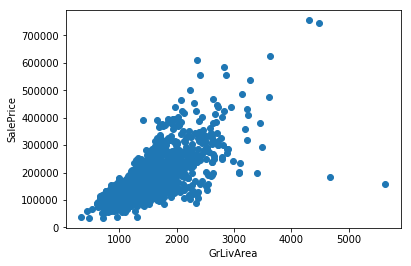

In [23]:
fig, ax = plt.subplots()
ax.scatter(x = house['GrLivArea'], y = house['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

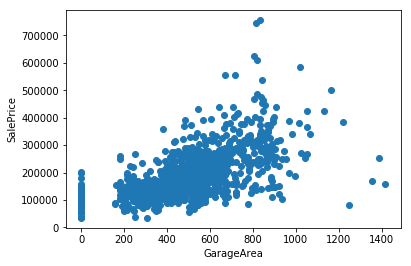

In [24]:
fig, ax = plt.subplots()
ax.scatter(x = house['GarageArea'], y = house['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GarageArea')
plt.show()

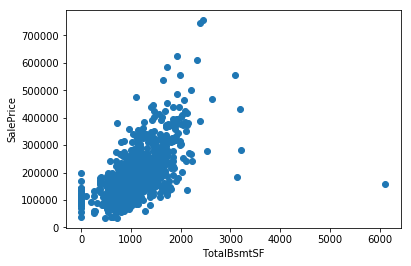

In [25]:
fig, ax = plt.subplots()
ax.scatter(x = house['TotalBsmtSF'], y = house['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('TotalBsmtSF')
plt.show()

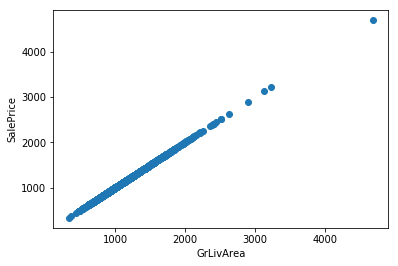

In [26]:
fig, ax = plt.subplots()
ax.scatter(x = house['1stFlrSF'], y = house['1stFlrSF'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

## 2 ) Missing Values Treatment

In [27]:
#Drop col with same value above certain percentage level
def getuniquevalues(df,percent):
    totalrow = df.shape[0]
    dic = {}
    for col in df.columns:
        count = df[col].value_counts().max()
        per = (count*100)/totalrow
        if per > percent:
            dic[col] = per
    return dic

Columns_Dic = getuniquevalues(house,99.8)
print('Number of col with same values: ',len(Columns_Dic))

Number of col with same values:  1


In [28]:
#Deleting columns
Columns_List= list(Columns_Dic.keys())
house = house.drop(Columns_List,axis=1)

In [29]:
# col with same value above 99.8 percentage level
Columns_List

['Utilities']

In [30]:
a = pd.DataFrame(round(100*(house.isnull().sum()/len(house.index)), 2)).reset_index()
a.columns = ['column_name', 'null_pct']
a = a.loc[ (a['null_pct'] > 0) , :]
a.sort_values(by='null_pct', ascending=False)

,column_name,null_pct
70,PoolQC,99.52
72,MiscFeature,96.30
5,Alley,93.77
71,Fence,80.75
55,FireplaceQu,47.26
2,LotFrontage,17.74
56,GarageType,5.55
57,GarageYrBlt,5.55
58,GarageFinish,5.55
61,GarageQual,5.55


In [31]:
# droped a couple of columns that have a really high % of missing values.
house.drop(['PoolQC','Alley','Fence','MiscFeature' ], axis=1 , inplace = True)

In [32]:
#FireplaceQu
house['FireplaceQu'] = house['FireplaceQu'].fillna('no')
# LotFrontage : NA most likely means no lot frontage
house['LotFrontage'] = house['LotFrontage'].fillna(0)
# GarageType etc : data description says NA for garage features is "no garage"
house['GarageType'] = house['GarageType'].fillna("no")
house['GarageYrBlt'] = house['GarageYrBlt'].fillna("no")
house['GarageFinish'] = house['GarageFinish'].fillna("no")
house['GarageQual'] = house['GarageQual'].fillna("no")
house['GarageCond'] = house['GarageCond'].fillna("no")
# BsmtQual etc : data description says NA for basement features is "no basement"
house['BsmtExposure'] = house['BsmtExposure'].fillna("no")
house['BsmtFinType2'] = house['BsmtFinType2'].fillna("no")
house['BsmtFinType1'] = house['BsmtFinType1'].fillna("no")
house['BsmtCond'] = house['BsmtCond'].fillna("no")
house['BsmtQual'] = house['BsmtQual'].fillna("no")
# MasVnrType : 
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(house[['MasVnrArea']]) 
house['MasVnrArea'] = imp.transform(house[['MasVnrArea']]) 

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(house[['MasVnrType']]) 
house['MasVnrType'] = imp.transform(house[['MasVnrType']])


#Electrical
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(house[['Electrical']]) 
house['Electrical'] = imp.transform(house[['Electrical']])

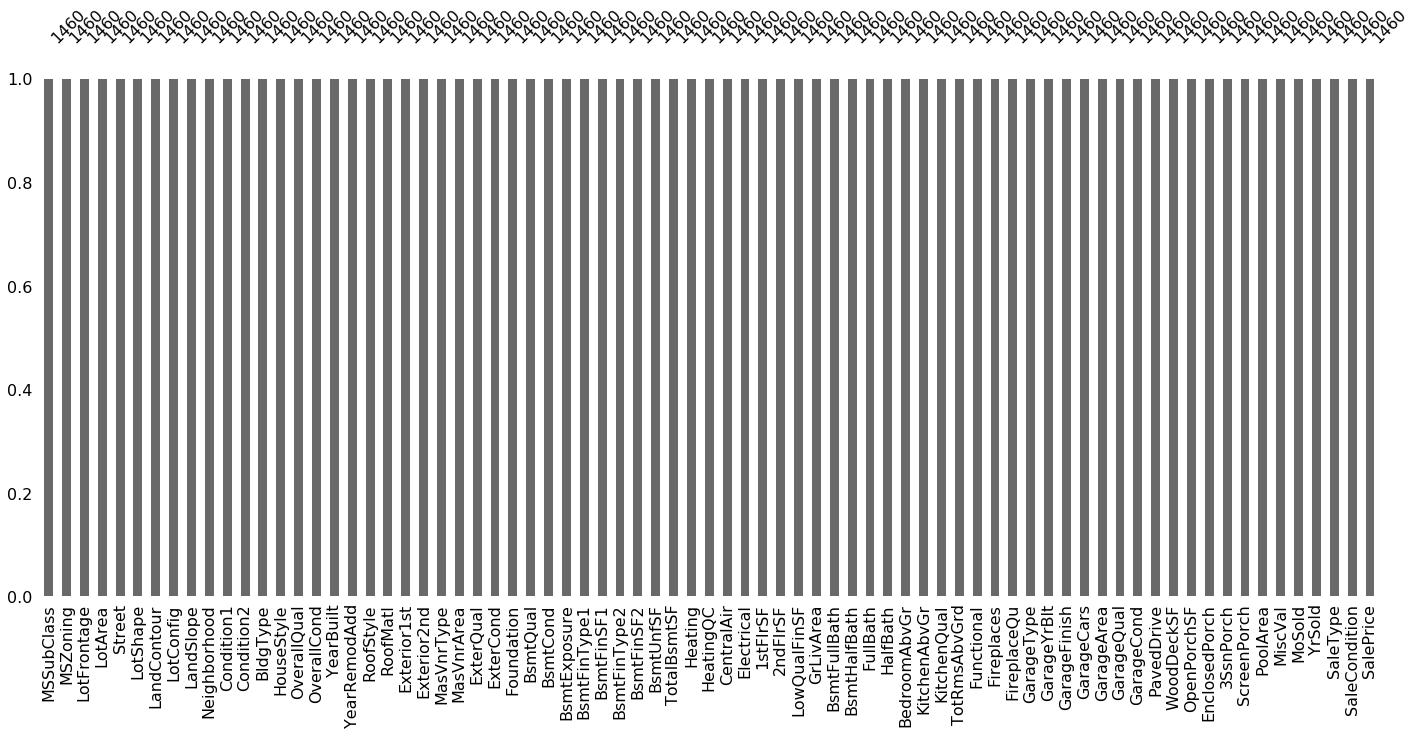

In [33]:
msno.bar(house);

In [34]:
a = pd.DataFrame(round(100*(house.isnull().sum()/len(house.index)), 2)).reset_index()
a.columns = ['column_name', 'null_pct']
a = a.loc[ (a['null_pct'] > 0) , :]
a.sort_values(by='null_pct', ascending=False)

,column_name,null_pct


In [35]:
# Some numerical features are actually really categories
house = house.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

In [36]:
# Encode some categorical features as ordered numbers when there is information in the order
house = house.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"no" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"no" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"no" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"no" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"no" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"no" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"no" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"no" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},}
                     )

In [37]:
# summary of the dataset: 
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null int64
LotShape         1460 non-null int64
LandContour      1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null int64
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
MasVnrArea       1460 non-

In [38]:
#NUMERIC FEATURES
num_df=house.select_dtypes(include='number')
num_df.shape

(1460, 50)

In [39]:
# before outliers are removed 
num_df.describe()

,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,57.623288,10516.828082,1.995890,3.591781,2.937671,6.099315,5.575342,1971.267808,1984.865753,103.685262,3.39589,3.083562,3.489041,2.934932,3.545890,443.639726,1.247260,46.549315,567.240411,1057.429452,4.145205,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,3.511644,6.517808,7.841781,0.613014,1.825342,1.767123,472.980137,2.810274,2.808904,1.856164,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753,180921.195890
std,34.664304,9981.264932,0.063996,0.582296,0.276232,1.382997,1.112799,30.202904,20.645407,180.569112,0.57428,0.351054,0.876478,0.552159,2.107776,456.098091,0.892332,161.319273,441.866955,438.705324,0.959501,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,0.663760,1.625393,0.667698,0.644666,1.810877,0.747315,213.804841,0.722898,0.719685,0.496592,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095,79442.502883
min,0.000000,1300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,2.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,42.000000,7553.500000,2.000000,3.000000,3.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,3.00000,3.000000,3.000000,3.000000,1.000000,0.000000,1.000000,0.000000,223.000000,795.750000,3.000000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,5.000000,8.000000,0.000000,0.000000,1.000000,334.500000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,63.000000,9478.500000,2.000000,4.000000,3.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,3.00000,3.000000,4.000000,3.000000,4.000000,383.500000,1.000000,0.000000,477.500000,991.500000,5.000000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,3.000000,6.000000,8.000000,1.000000,2.000000,2.000000,480.000000,3.000000,3.000000,2.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,79.000000,11601.500000,2.000000,4.000000,3.000000,7.000000,6.000000,2000.000000,2004.000000,164.250000,4.00000,3.000000,4.000000,3.000000,6.000000,712.250000,1.000000,0.000000,808.000000,1298.250000,5.000000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,4.000000,7.000000,8.000000,1.000000,4.000000,2.000000,576.000000,3.000000,3.000000,2.000000,168.000000,68.000000,0

In [40]:
# function to remove outliers
def outliers(x): 
       return np.abs(x- x.median()) > 1.5*(x.quantile(.75)-x.quantile(0.25))
house = house[~num_df.apply(outliers).any(axis=1)]

In [41]:
# after outliers are removed 
house.describe()

,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,202.000000,202.000000,202.0,202.000000,202.0,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.0,202.000000,202.0,202.000000,202.000000,202.0,202.0,202.000000,202.000000,202.000000,202.000000,202.000000,202.0,202.000000,202.000000,202.0,202.000000,202.000000,202.000000,202.0,202.000000,202.000000,202.0,202.000000,202.000000,202.000000,202.000000,202.0,202.0,202.0,202.000000,202.000000,202.0,202.0,202.0,202.0,202.0,202.000000,202.000000
mean,68.178218,9128.212871,2.0,3.638614,3.0,6.183168,5.202970,1988.693069,1990.594059,52.120646,3.480198,3.0,3.722772,3.0,3.782178,427.202970,1.0,0.0,579.633663,1006.836634,4.490099,1045.915842,327.356436,0.0,1373.272277,0.425743,0.0,1.638614,0.455446,2.787129,1.0,3.564356,6.232673,8.0,0.405941,1.297030,1.841584,483.787129,3.0,3.0,2.0,65.321782,38.594059,0.0,0.0,0.0,0.0,0.0,2007.762376,172340.019802
std,14.366140,2303.976919,0.0,0.481596,0.0,1.022685,0.415365,21.299215,19.171744,76.605431,0.500849,0.0,0.491091,0.0,2.185907,377.352763,0.0,0.0,349.529512,254.825192,0.786959,245.642437,394.821720,0.0,308.057500,0.495684,0.0,0.501832,0.499248,0.487896,0.0,0.506983,1.092863,0.0,0.531181,1.704805,0.451260,124.735897,0.0,0.0,0.0,80.005973,35.344693,0.0,0.0,0.0,0.0,0.0,1.324462,38084.137667
min,32.000000,3604.000000,2.0,3.000000,3.0,4.000000,4.000000,1920.000000,1950.000000,0.000000,3.000000,3.0,3.000000,3.0,1.000000,0.000000,1.0,0.0,0.000000,384.000000,2.000000,616.000000,0.000000,0.0,773.000000,0.000000,0.0,1.000000,0.000000,2.000000,1.0,2.000000,4.000000,8.0,0.000000,0.000000,1.000000,200.000000,3.0,3.0,2.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2006.000000,66500.000000
25%,60.500000,7920.500000,2.0,3.000000,3.0,5.000000,5.000000,1972.000000,1976.000000,0.000000,3.000000,3.0,3.000000,3.0,1.000000,0.000000,1.0,0.0,299.000000,840.000000,4.000000,864.000000,0.000000,0.0,1131.250000,0.000000,0.0,1.000000,0.000000,3.000000,1.0,3.000000,5.000000,8.0,0.000000,0.000000,2.000000,400.000000,3.0,3.0,2.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2007.000000,140000.000000
50%,70.000000,8996.500000,2.0,4.000000,3.0,6.000000,5.000000,2000.000000,2000.000000,0.000000,3.000000,3.0,4.000000,3.0,4.000000,460.000000,1.0,0.0,556.500000,942.000000,5.000000,994.500000,0.000000,0.0,1354.000000,0.000000,0.0,2.000000,0.000000,3.000000,1.0,4.000000,6.000000,8.0,0.000000,0.000000,2.000000,489.500000,3.0,3.0,2.0,0.000000,36.000000,0.0,0.0,0.0,0.0,0.0,2008.000000,175500.000000
75%,76.750000,10415.500000,2.0,4.000000,3.0,7.000000,5.000000,2005.000000,2005.000000,108.000000,4.000000,3.0,4.000000,3.0,6.000000,724.000000,1.0,0.0,844.500000,1193.750000,5.000000,1219.500000,735.750000,0.0,1604.000000,1.000000,0.0,2.000000,1.000000,3.000000,1.0,4.000000,7.000000,8.0,1.000000,3.000000,2.000000,573.500000,3.0,3.0,2.0,139.500000,63.000000,0.0,0.0,0.0,0.0,0.0,2009.000000,199725.000000
max,109.000000,15523.000000,2.0,4.000000,3.0,8.000000,6.000000,2009.000000,2010.000000,246.000000,4.000000,3.0,5.000000,3.0,6.000000,1400.000000,1.0,0.0,1349.000000,1734.000000,5.000000,1734.000000,1081.000000,0.0,2031.000000,1.000000,0.0,3.000000,1.000000,4.000000,1.0,4.000000,9.000000,8.0,2.000000,4.000000,3.000000,826.000000,3.0,3.0,2.0,252.000000,125.000000,0.0,0.0,0.0,0.0,0.0,2010.000000,260000.000000


## 3. Data Preparation

In [42]:
#,  'OverallGrade', 'GarageGrade',
    #   'ExterGrade', 'KitchenScore', 'FireplaceScore', 'GarageScore',
     #  'TotalBath'
# split into X and y
X = house.loc[:, ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']]

y = house['SalePrice']

In [43]:
#CATEGORICAL FEATURES
cat_df=X.select_dtypes(include='object')
cat_df.shape

(202, 25)

In [44]:
# creating dummy variables for categorical variables
# convert into dummies
cat_df_dummies = pd.get_dummies(cat_df, drop_first=True)
cat_df_dummies.head()

,MSSubClass_SC160,MSSubClass_SC180,MSSubClass_SC190,MSSubClass_SC20,MSSubClass_SC30,MSSubClass_SC50,MSSubClass_SC60,MSSubClass_SC70,MSSubClass_SC80,MSSubClass_SC85,MSSubClass_SC90,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,BsmtExposure_1,BsmtExposure_2,BsmtExposure_3,BsmtExposure_No,Heating_GasW,CentralAir_Y,Electrical_SBrkr,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageYrBlt_1936.0,GarageYrBlt_1939.0,GarageYrBlt_1940.0,GarageYrBlt_1941.0,GarageYrBlt_1946.0,GarageYrBlt_1950.0,GarageYrBlt_1953.0,GarageYrBlt_1954.0,GarageYrBlt_1956.0,GarageYrBlt_1957.0,GarageYrBlt_1958.0,GarageYrBlt_1959.0,GarageYrBlt_1960.0,GarageYrBlt_1961.0,GarageYrBlt_1962.0,GarageYrBlt_1963.0,GarageYrBlt_1964.0,GarageYrBlt_1965.0,GarageYrBlt_1967.0,GarageYrBlt_1968.0,GarageYrBlt_1969.0,GarageYrBlt_1970.0,GarageYrBlt_1972.0,GarageYrBlt_1974.0,GarageYrBlt_1975.0,GarageYrBlt_1976.0,GarageYrBlt_1977.0,GarageYrBlt_1978.0,GarageYrBlt_1979.0,GarageYrBlt_1980.0,GarageYrBlt_1981.0,GarageYrBlt_1984.0,GarageYrBlt_1985.0,GarageYrBlt_1986.0,GarageYrBlt_1987.0,GarageYrBlt_1988.0,GarageYrBlt_1992.0,GarageYrBlt_1993.0,GarageYrBlt_1994.0,GarageYrBlt_1996.0,GarageYrBlt_1997.0,GarageYrBlt_1998.0,GarageYrBlt_1999.0,GarageYrBlt_2000.0,GarageYrBlt_2001.0,GarageYrBlt_2002.0,GarageYrBlt_2003.0,GarageYrBlt_2004.0,GarageYrBlt_2005.0,GarageYrBlt_2006.0,GarageYrBlt_2007.0,GarageYrBlt_2008.0,GarageYrBlt_2009.0,GarageYrBlt_2010.0,GarageFinish_RFn,GarageFinish_Unf,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
10,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
18,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,1,0,

In [45]:
# drop categorical variables 
X = X.drop(list(cat_df.columns), axis=1)

In [46]:
# concat dummy variables with X
X = pd.concat([X, cat_df_dummies], axis=1)

In [47]:
X.head()

,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,MSSubClass_SC160,MSSubClass_SC180,MSSubClass_SC190,MSSubClass_SC20,MSSubClass_SC30,MSSubClass_SC50,MSSubClass_SC60,MSSubClass_SC70,MSSubClass_SC80,MSSubClass_SC85,MSSubClass_SC90,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SFoyer,...,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,BsmtExposure_1,BsmtExposure_2,BsmtExposure_3,BsmtExposure_No,Heating_GasW,CentralAir_Y,Electrical_SBrkr,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageYrBlt_1936.0,GarageYrBlt_1939.0,GarageYrBlt_1940.0,GarageYrBlt_1941.0,GarageYrBlt_1946.0,GarageYrBlt_1950.0,GarageYrBlt_1953.0,GarageYrBlt_1954.0,GarageYrBlt_1956.0,GarageYrBlt_1957.0,GarageYrBlt_1958.0,GarageYrBlt_1959.0,GarageYrBlt_1960.0,GarageYrBlt_1961.0,GarageYrBlt_1962.0,GarageYrBlt_1963.0,GarageYrBlt_1964.0,GarageYrBlt_1965.0,GarageYrBlt_1967.0,GarageYrBlt_1968.0,GarageYrBlt_1969.0,GarageYrBlt_1970.0,GarageYrBlt_1972.0,GarageYrBlt_1974.0,GarageYrBlt_1975.0,GarageYrBlt_1976.0,GarageYrBlt_1977.0,GarageYrBlt_1978.0,GarageYrBlt_1979.0,GarageYrBlt_1980.0,GarageYrBlt_1981.0,GarageYrBlt_1984.0,GarageYrBlt_1985.0,GarageYrBlt_1986.0,GarageYrBlt_1987.0,GarageYrBlt_1988.0,GarageYrBlt_1992.0,GarageYrBlt_1993.0,GarageYrBlt_1994.0,GarageYrBlt_1996.0,GarageYrBlt_1997.0,GarageYrBlt_1998.0,GarageYrBlt_1999.0,GarageYrBlt_2000.0,GarageYrBlt_2001.0,GarageYrBlt_2002.0,GarageYrBlt_2003.0,GarageYrBlt_2004.0,GarageYrBlt_2005.0,GarageYrBlt_2006.0,GarageYrBlt_2007.0,GarageYrBlt_2008.0,GarageYrBlt_2009.0,GarageYrBlt_2010.0,GarageFinish_RFn,GarageFinish_Unf,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,2,4,3,7,5,2003,2003,196.0,4,3,4,3,6,706,1,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,8,0,0,2,548,3,3,2,0,61,0,0,0,0,0,2008,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,68.0,11250,2,3,3,7,5,2001,2002,162.0,4,3,4,3,6,486,1,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,8,1,3,2,608,3,3,2,0,42,0,0,0,0,0,2008,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,

In [48]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandSlope',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       ...
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLw',
       'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial'],
      dtype='object', length=211)

In [49]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## 3. Model Building and Evaluation

## Ridge and Lasso Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## RIDGE (and tuning with GridSearchCV)

In [50]:
reg_ridge=Ridge()
reg_ridge.fit(X_train,y_train)
pred1=reg_ridge.predict(X_train)
pred=reg_ridge.predict(X_test)

print(np.sqrt(mean_squared_error(y_test,pred)))

24602.379801472085


In [51]:
# r2_score of RIDGE before tuning(train)

r2_score(y_train, pred1)

0.9967085345262747

In [52]:
# r2_score of RIDGE before tuning(test)

r2_score(y_test, pred)

0.5597125454045486

In [53]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}




# cross validation
folds = 10
model_cv = GridSearchCV(estimator = Ridge(), 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    5.5s finished
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [54]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.013200,0.005382,0.004400,0.002156,0.0001,{'alpha': 0.0001},-20968.891666,-34033.423164,-35147.207175,-21184.318167,-40032.932661,-19525.744543,-37122.222717,-32660.640278,-26526.014960,-29828.835564,-29641.078895,6952.608655,28,-1.215995,-0.488878,-1.059099,-0.244762,-0.540080,-0.474365,-0.752495,-0.544696,-0.517706,-0.763194,-0.660127,0.277796
1,0.008402,0.002152,0.002814,0.001842,0.001,{'alpha': 0.001},-20849.039289,-33892.525019,-34861.882303,-21177.273922,-39883.702438,-19503.556241,-37017.121909,-32536.938307,-26425.276374,-29657.660008,-29518.572345,6906.842448,27,-11.845412,-4.834518,-10.468880,-2.442083,-5.361663,-4.706291,-7.357863,-5.416989,-5.141105,-7.540101,-6.511490,2.700279
2,0.017993,0.006006,0.005603,0.001960,0.01,{'alpha': 0.01},-19890.834473,-32633.891496,-32329.106785,-21112.416576,-38473.423818,-19290.423975,-35967.190351,-31443.379056,-25653.577869,-28143.526360,-28432.763298,6477.912672,26,-94.364971,-43.580301,-93.970174,-23.892601,-50.118510,-43.679162,-62.492304,-51.391307,-48.162233,-67.590484,-57.924205,21.230328
3,0.009601,0.001962,0.003997,0.000006,0.05,{'alpha': 0.05},-18087.075044,-29032.038784,-25928.156442,-20897.330959,-33552.534378,-18939.050371,-31814.166365,-28735.611623,-23598.395403,-23973.334294,-25403.509123,5049.542054,25,-260.170479,-155.667016,-329.842861,-109.848828,-200.339864,-170.142174,-224.586819,-213.603795,-195.226472,-236.700497,-209.612880,57.183145
4,0.009198,0.001838,0.003205,0.001603,0.1,{'alpha': 0.1},-17248.876154,-26565.235255,-21706.636954,-20695.300695,-29424.123809,-18433.471633,-28353.525021,-27363.150305,-22665.282337,-21669.848557,-23368.831108,4053.281332,24,-367.944533,-241.890130,-495.741509,-201.889733,-332.246921,-285.227962,-370.539344,-362.205736,-326.235324,-354.929658,-333.885085,76.328618


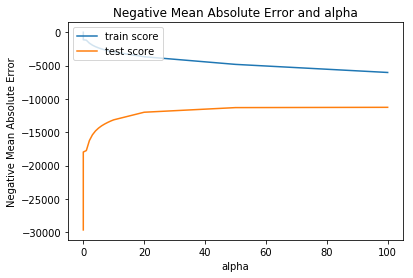

In [55]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [56]:
# Making predictions
pred1=model_cv.predict(X_train)
pred=model_cv.predict(X_test)
# mean squared error
print(np.sqrt(mean_squared_error(y_test,pred)))

12151.353034405161


In [57]:
# best params
model_cv.best_params_

{'alpha': 100}

In [58]:
# coefficient
alpha = 50
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 9.80498748e+02,  1.50699260e+02,  0.00000000e+00,  8.02163354e+02,
        0.00000000e+00,  3.31945072e+03,  1.57528388e+02,  1.54957173e+03,
        2.09942203e+03,  1.50705917e+02,  1.75841942e+03,  0.00000000e+00,
        2.05758769e+02,  0.00000000e+00,  1.74429343e+03,  2.45455291e+03,
        0.00000000e+00,  0.00000000e+00, -6.73108238e+02,  2.71151028e+03,
        4.69349809e+02,  2.80680441e+03,  1.76392418e+03,  0.00000000e+00,
        4.49885446e+03,  1.15179313e+03,  0.00000000e+00,  1.91127810e+03,
        4.25621128e+02,  1.13743636e+02,  0.00000000e+00,  1.92192319e+03,
        1.22819006e+03,  0.00000000e+00,  1.10162217e+03,  1.57792197e+03,
        1.51985152e+03,  3.75480691e+03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.41699483e+03,  1.78530730e+03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        9.33763921e+02, -5.22102092e+02, -5.65714703e+02, -1.23472969e+02,
       -9.11488107e+02, -

Text(0,0.5,'pred')

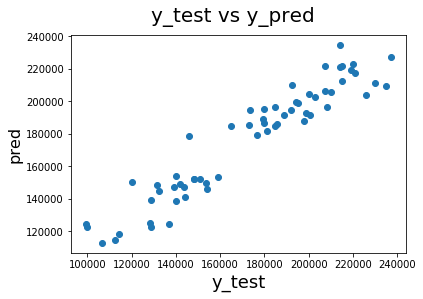

In [59]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('pred', fontsize = 16)  

In [60]:
# r2_score of RIDGE after tuning with GridSearchCV

r2_score(y_train, pred1)

0.9469864630166906

In [61]:
# r2_score of RIDGE after tuning with GridSearchCV

r2_score(y_test, pred)

0.8925933055496523

 the r-squared on training and test data is about 94.6% and 89.2%

In [62]:
## LASSO (and tuning with GridSearchCV)
reg_lasso=Lasso()
reg_lasso.fit(X_train,y_train)
pred1=reg_lasso.predict(X_train)
pred=reg_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

42676.48765525232


In [63]:
# r2_score of LASSO before tuning

r2_score(y_train, pred1)

0.9990855542751408

In [64]:
# r2_score of LASSO before tuning

r2_score(y_test, pred)

-0.3248277362025731

In [65]:


# cross validation
model_cv = GridSearchCV(estimator = Lasso(), 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:   50.7s finished
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [66]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.304809,0.049046,0.003604,0.002155,0.0001,{'alpha': 0.0001},-23077.695837,-34029.283968,-30807.109933,-31383.120990,-49626.531176,-30252.910248,-43283.164574,-33252.919822,-23182.582837,-25967.859148,-32419.590038,8010.113967,28,-396.032392,-242.677501,-342.039639,-92.183614,-84.243968,-187.787938,-242.647335,-138.328255,-102.818235,-335.383469,-216.414235,107.842107
1,0.180798,0.026596,0.002801,0.001833,0.001,{'alpha': 0.001},-23075.293456,-34027.107786,-30802.061335,-31381.598798,-49616.381632,-30248.216338,-43278.938252,-33247.860204,-23185.004288,-25966.210971,-32416.146924,8007.683729,27,-396.020438,-242.685167,-342.097196,-92.075255,-84.304167,-187.798926,-242.644959,-138.348495,-102.850303,-335.408692,-216.423360,107.849711
2,0.220020,0.012134,0.002388,0.001950,0.01,{'alpha': 0.01},-23051.360399,-34005.339087,-30751.600396,-31362.972853,-49514.844622,-30200.884559,-43236.812677,-33197.288586,-23209.185785,-25949.861955,-32381.372151,7983.451506,26,-395.900444,-242.763454,-342.673071,-91.591406,-84.906123,-187.903220,-242.621215,-138.550949,-103.171192,-335.671437,-216.575251,107.858416
3,0.240020,0.033748,0.002794,0.001829,0.05,{'alpha': 0.05},-22949.696975,-33906.695992,-30527.632808,-31265.039757,-49064.463108,-29988.809952,-43052.381343,-32972.506121,-23313.452832,-25879.558747,-32225.766127,7876.641347,25,-395.359108,-243.237242,-345.248773,-89.299459,-87.614890,-188.422243,-242.548152,-139.532711,-104.605029,-336.904884,-217.277249,107.923893
4,0.289212,0.043850,0.003596,0.002154,0.1,{'alpha': 0.1},-22839.767284,-33810.474019,-30248.649672,-31113.576247,-48510.131470,-29726.138707,-42826.146063,-32714.144301,-23431.859020,-25793.795535,-32035.782409,7746.837957,24,-394.691132,-243.957512,-348.538388,-86.312034,-91.046931,-189.246635,-242.496567,-140.748645,-106.511148,-338.520626,-218.206962,108.047114


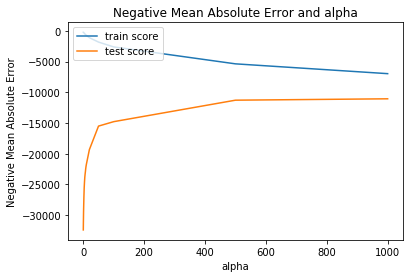

In [67]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [68]:
# Making predictions
pred1=model_cv.predict(X_train)
pred=model_cv.predict(X_test)
# mean squared error
print(np.sqrt(mean_squared_error(y_test,pred)))

11108.461539341655


In [69]:
# best params
model_cv.best_params_

{'alpha': 1000}

In [70]:
#coefficient
alpha =1000

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  6.41428568e+03,  0.00000000e+00,  0.00000000e+00,
        7.36605962e+03, -0.00000000e+00,  1.07169841e+03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.22163634e+03,  4.20952464e+03,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  3.52797353e+03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.40329406e+04,  0.00000000e+00,  0.00000000e+00,  4.38909195e+02,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  1.85274576e+03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.61278229e+03,
        0.00000000e+00,  4.09224141e+03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.54519282e+03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -4.24992315e+02, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -

In [71]:
# creating a dictionary of the mapped coef and feature name
coef_dict = {}
for coef, feat in zip(lasso.coef_, X.columns):
    coef_dict[feat] = coef

## variables that are significant in predicting the price of a house and how well those variables describe the price of a house

In [72]:
# features that have non zero coefficient 
for key, value in coef_dict.items():
    if 0 != value:
        print(key,value)

OverallQual 6414.285678712437
YearRemodAdd 7366.059619931893
ExterQual 1071.6984085950353
BsmtFinType1 1221.6363432947905
BsmtFinSF1 4209.5246355075415
TotalBsmtSF 3527.973531668253
GrLivArea 14032.940556517364
FullBath 438.90919536950065
KitchenQual 1852.7457573891998
FireplaceQu 1612.7822897364506
GarageArea 4092.241412295253
WoodDeckSF 2545.192820899818
MSSubClass_SC160 -424.9923149633
MSSubClass_SC70 1697.3391162197952
LandContour_HLS 408.1791686431157
LandContour_Low -342.7537974712266
Neighborhood_Crawfor 13.53758539244158
Neighborhood_NoRidge -336.49378871792044
Neighborhood_NridgHt 1602.08790154486
Neighborhood_Somerst 2390.9732753765416
Condition1_Norm 637.0899855627208
Condition1_RRAe -1147.961308462505
Exterior1st_Plywood -1140.780390523569
Exterior1st_VinylSd 510.2519115151062
Exterior1st_WdShing -18.291075508588374
Exterior2nd_HdBoard -444.3566237062135
Exterior2nd_VinylSd 7.483477142398949
Exterior2nd_Wd Shng -2.484731040336163
Foundation_CBlock -2062.0841685486957
BsmtEx

Text(0,0.5,'pred')

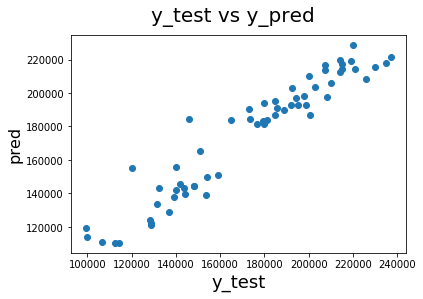

In [73]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('pred', fontsize = 16) 

In [74]:
# r2_score of LASSO after tuning with GridSearchCV(train)

r2_score(y_train, pred1)

0.9409443879718228

In [75]:
# r2_score of LASSO after tuning with GridSearchCV(test)

r2_score(y_test, pred)

0.9102385405870728

 the r-squared on training and test data is about 94% and 91%

#### Checking the correlations between the final predictor variables

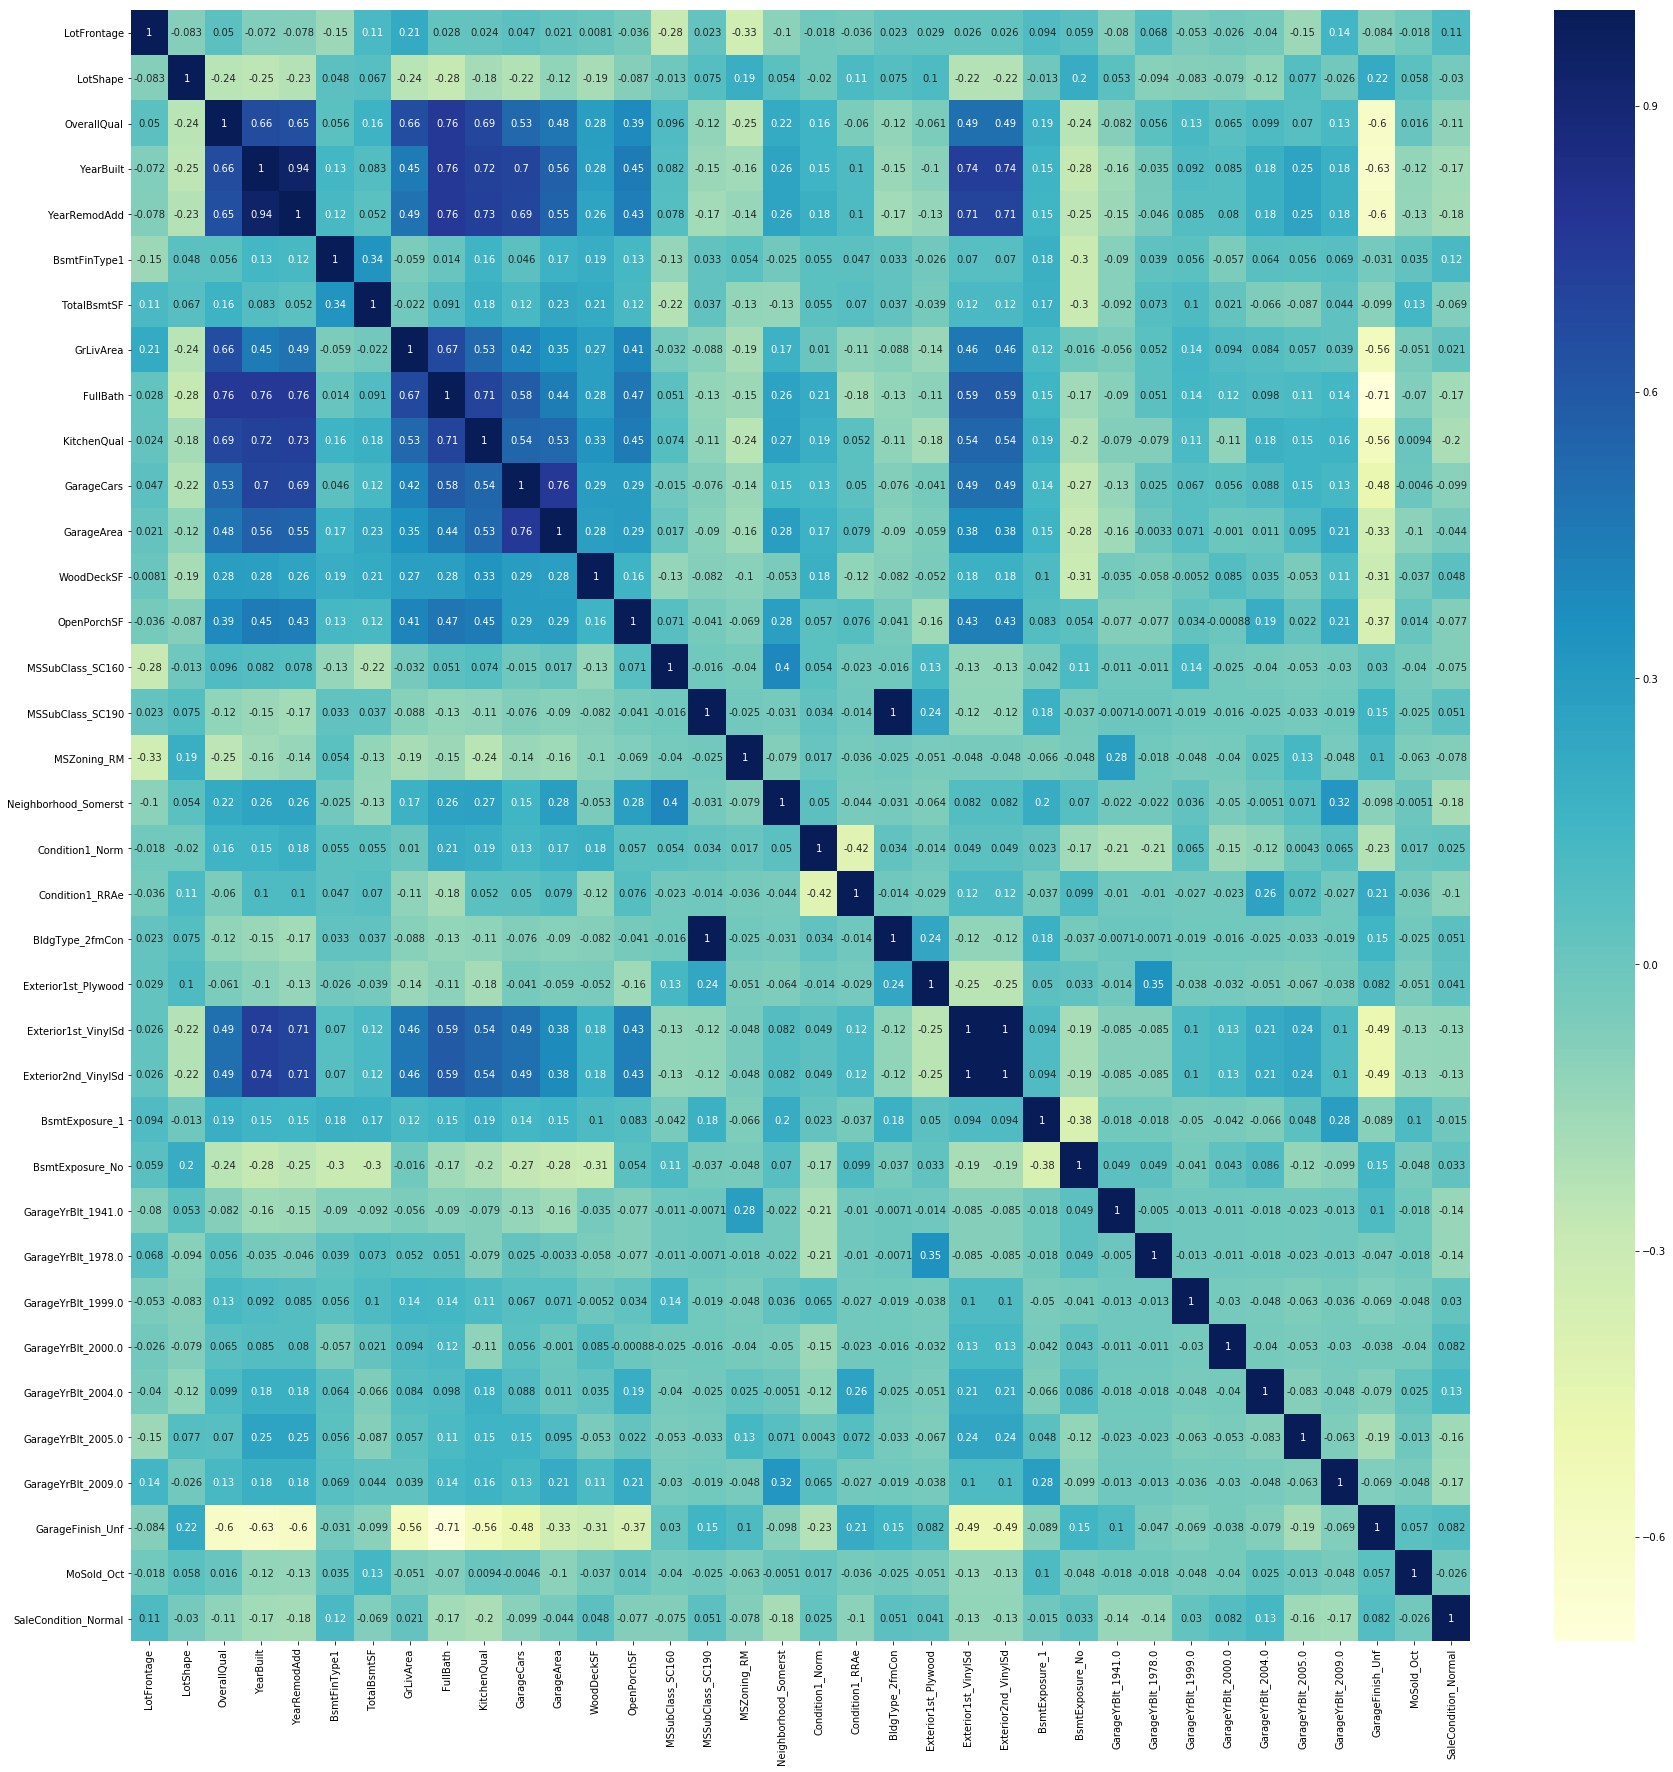

In [76]:
# Figure size
plt.figure(figsize=(30,30))

# Heatmap
sns.heatmap(X[['LotFrontage',
'LotShape',
'OverallQual',
'YearBuilt',
'YearRemodAdd',
'BsmtFinType1',
'TotalBsmtSF',
'GrLivArea',
'FullBath',
'KitchenQual',
'GarageCars',
'GarageArea',
'WoodDeckSF',
'OpenPorchSF',
'MSSubClass_SC160',
'MSSubClass_SC190',
'MSZoning_RM',
'Neighborhood_Somerst',
'Condition1_Norm',
'Condition1_RRAe',
'BldgType_2fmCon',
'Exterior1st_Plywood',
'Exterior1st_VinylSd',
'Exterior2nd_VinylSd',
'BsmtExposure_1',
'BsmtExposure_No',
'GarageYrBlt_1941.0',
'GarageYrBlt_1978.0',
'GarageYrBlt_1999.0',
'GarageYrBlt_2000.0',
'GarageYrBlt_2004.0',
'GarageYrBlt_2005.0',
'GarageYrBlt_2009.0',
'GarageFinish_Unf',
'MoSold_Oct',
'SaleCondition_Normal']].corr(), cmap="YlGnBu", annot=True)
plt.show()